In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [4]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/project2020/archive/main/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((32,32))
    img = np.array(img)
    if(img.shape == (32,32,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
# This cell updates result list for images without tumor
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/project2020/archive/main/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img = Image.open(path)
    img = img.resize((32,32))
    img = np.array(img)
    if(img.shape == (32,32,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(2891, 32, 32, 3)

In [7]:
result = np.array(result)
result = result.reshape(2891,2)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:
print(y_train[0])
print(y_test[0])

[0. 1.]
[1. 0.]


In [10]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu', input_shape=(32, 32, 3)))

# 1st Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu'))

# Fully Connected Layers
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu'))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))

# Output Layer
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       221440    
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 384)       1327488   
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 256)       884992    
                                                        

In [11]:
from keras.optimizers import SGD

In [12]:
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
y_train.shape

(2312, 2)

In [14]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/50
58/58 [==============================] - 17s 111ms/step - loss: 0.8652 - accuracy: 0.6847 - val_loss: 0.5036 - val_accuracy: 0.7444
Epoch 2/50
58/58 [==============================] - 5s 84ms/step - loss: 0.4349 - accuracy: 0.8019 - val_loss: 0.3591 - val_accuracy: 0.8463
Epoch 3/50
58/58 [==============================] - 5s 85ms/step - loss: 0.2905 - accuracy: 0.8832 - val_loss: 0.2823 - val_accuracy: 0.8843
Epoch 4/50
58/58 [==============================] - 5s 86ms/step - loss: 0.2258 - accuracy: 0.9122 - val_loss: 0.1508 - val_accuracy: 0.9534
Epoch 5/50
58/58 [==============================] - 5s 86ms/step - loss: 0.1597 - accuracy: 0.9446 - val_loss: 0.1202 - val_accuracy: 0.9585
Epoch 6/50
58/58 [==============================] - 5s 86ms/step - loss: 0.0957 - accuracy: 0.9697 - val_loss: 0.1054 - val_accuracy: 0.9637
Epoch 7/50
58/58 [==============================] - 5s 87ms/step - loss: 0.0486 - accuracy: 0.9866 - val_loss: 0.0530 - val_accuracy: 0.9793
Epoch 8/50


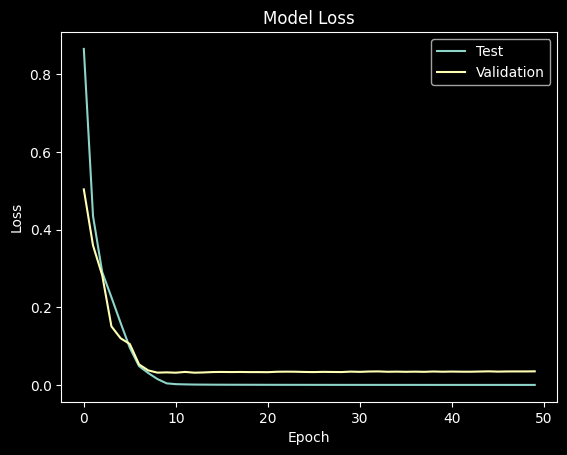

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [16]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.9871015548706% Confidence This Is No, Its not a tumor


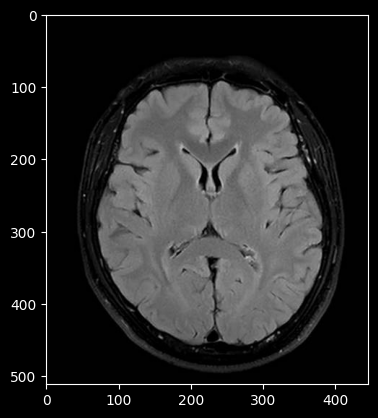

In [17]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/project2020/archive/pred/pred53.jpg")
x = np.array(img.resize((32,32)))
x = x.reshape(1,32,32,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
y_pred=model.predict(x_test)

19/19 [==============================] - 0s 21ms/step


In [20]:
y_pred = (y_pred > 0.5)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       298
           1       0.99      0.98      0.99       281

   micro avg       0.99      0.99      0.99       579
   macro avg       0.99      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579
 samples avg       0.99      0.99      0.99       579



In [22]:
import numpy as np

# Assuming y_test and y_pred are your true and predicted labels respectively

# Convert multilabel-indicator format to binary format
y_test_binary = np.argmax(y_test, axis=1)
y_pred_binary = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

print(cm)

[[296   2]
 [  5 276]]


In [24]:
import seaborn as sns

In [23]:
model.save("/content/drive/MyDrive/saved model/AlexNet.h5")